# Exercise 06 : Scatter Matrix

In [1]:
import pandas as pd
import sqlite3
from pandas.plotting import scatter_matrix

In [2]:
try:
    connection = sqlite3.connect('../data/checking-logs.sqlite.sqlite')
    print("Successfully connect to the database")
except sqlite3.Error as error:
    print("Error when connecting to the database", error)

Successfully connect to the database


## • create a dataframe where each user of the test group has the average diﬀerence, number of pageviews and number of commits
## • do not take project1 into account for calculations of the average diﬀerence and the number of commits
## • take the number of commits from the checker table

In [3]:
query = """
select diff.avg_diff, views.pageviews, comm.num_commits
    from
        (select uid, avg(avg_diff) as avg_diff
        from
            (select uid, cast((julianday(test.first_commit_ts) - julianday(datetime(deadlines.deadlines, 'unixepoch'))) * 24 as integer) as avg_diff
            from test
            left join deadlines on test.labname = deadlines.labs
            where not test.labname = 'project1'
            )
        group by uid) diff
    left join
        (select uid, count(*) as pageviews
        from pageviews
        group by uid
        ) views on diff.uid = views.uid
    left join
        (select uid, count(*) as num_commits
        from checker
        where labname != 'project1'
        group by uid
        ) comm on diff.uid = comm.uid
"""
df = pd.io.sql.read_sql(query, connection)
df

,avg_diff,pageviews,num_commits
0,-64.400000,28,62
1,-74.800000,89,20
2,-159.000000,143,61
3,-61.600000,47,51
4,-5.666667,3,5
5,-98.750000,16,118
6,-95.500000,10,65
7,-92.600000,179,79
8,-86.400000,149,60
9,-105.400000,317,18


In [4]:
connection.close()

## • the ﬁgsize is still the same, you can choose whatever fontsize you like as well as the color palette
## • the size of the dots should be 200
## • the width of the lines of the diagonal graphs (kde) should be 3

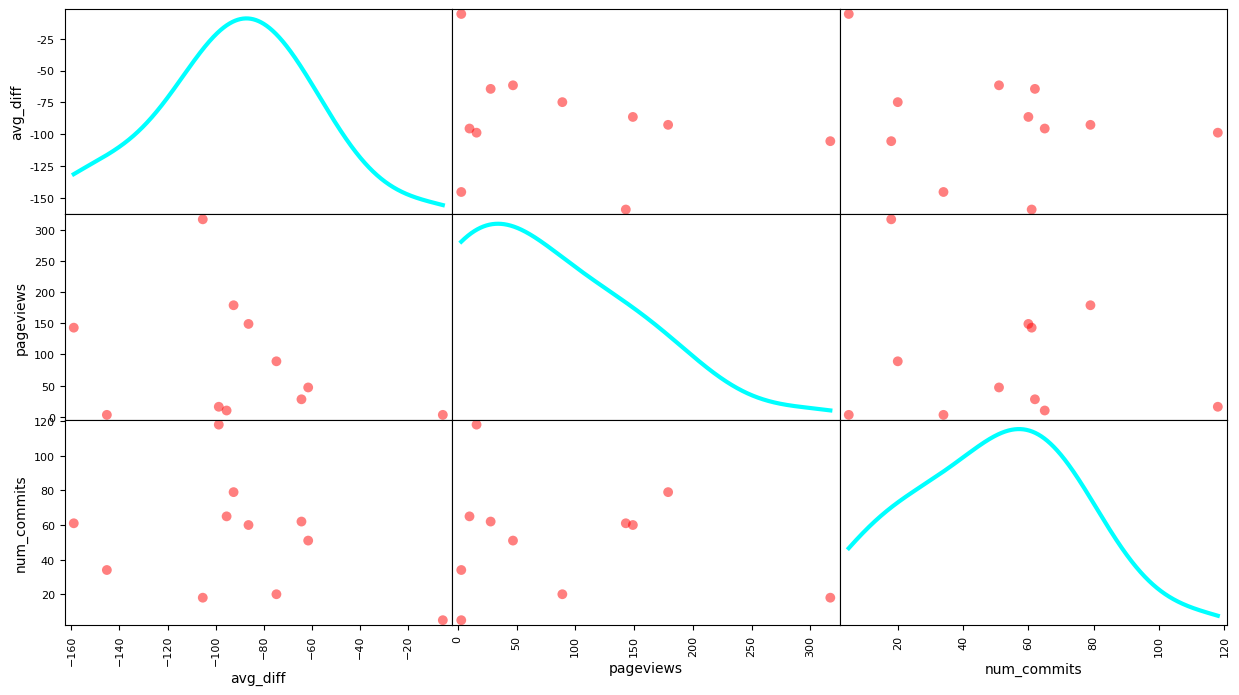

In [5]:
ax = scatter_matrix(df, figsize=(15, 8), s=200, diagonal='kde', density_kwds={'color': 'cyan', 'linewidth': 3}, color='red')

## • at the end of your Jupyter Notebook, create a markdown cell and insert the questions:

◦ “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?” The answer: yes or no.

◦ “Can we say that if a user has a low number of pageviews then they likely have a small average diﬀerence between the ﬁrst commit and the lab deadline?” The answer: yes or no.

◦ “Can we say that there are many users with a low number of commits and a few with a high number of commits”? The answer: yes or no.

◦ “Can we say that there are many users with a small average diﬀerence and a few with a large average diﬀerence”? The answer: yes or no.

### ◦ “Can we say that if a user has a low number of pageviews then they likely have a low number of commits?”
The answer: no.
### ◦ “Can we say that if a user has a low number of pageviews then they likely have a small average diﬀerence between the ﬁrst commit and the lab deadline?”
The answer: no.
### ◦ “Can we say that there are many users with a low number of commits and a few with a high number of commits”?
The answer: yes.
### ◦ “Can we say that there are many users with a small average diﬀerence and a few with a large average diﬀerence”?
The answer: no.